## Generadores Random
$$ Callen Ailen $$

$$ailen.callen@mi.unc.edu.ar$$

**1.INTRODUCCIÓN**


En este informe se presenta el método de resolución y los resultados correspondiente a los problemas 16, 17 y 18 de la primera guia de Astrometria 1.
Para ello se utilizaron generadores de congruencia lineal para generar numeros random y así resolver los problemas dados.
    Con este método, obtenemos valores pseudoaleatorios, ya que al ser determinados por algun algortimo no se pueden generar numeros 100% aleatorios.La aleatoriedad de los generadores congruenciales depende fuertemente de los valores iniciales.Algunos de ellos generan numeros con un periodo muy corto, o sea estan muy relacionados entre si, mientras que algunos generados particulares tienen un periodo lo suficientemente largo como considerar aleatorios los numeros generados.
    Los generadores congruenciales se basan en el metodo de congruencia lineal. Es decir, partiendo de una semilla inicial $ x_{0} $ el algoritmo esta dado por: $ x_{i} = (a*x_{i-1} +c)mod(M) $ donde a (multiplicador), c (incremento) y M (módulo) son enteros positivos fijados de antemano.

**2.DATOS Y RESULTADOS**

**2.1 PROBLEMA 16**

Gneración de números aleatorios uniformes en el rango [0, 1] usando el método de congruencia
lineal.

In [17]:
import numpy as np

In [18]:
import matplotlib.pyplot as plt


In [39]:

def gene(a,c,M,x0,n):
    x = []
    for i in range(n):
        r = (a*x0 + c) % M
        x.append(r/M)
        x0 = r

    return(x)

y=gene(57,1,256,10,10)
print(y)
print(y[:-1]) #de esta manera se escriben todas las componentes menos la ultima
print(y[1:]) #de esta manera se escriben todas las componentes menos la primera



[0.23046875, 0.140625, 0.01953125, 0.1171875, 0.68359375, 0.96875, 0.22265625, 0.6953125, 0.63671875, 0.296875]
[0.23046875, 0.140625, 0.01953125, 0.1171875, 0.68359375, 0.96875, 0.22265625, 0.6953125, 0.63671875]
[0.140625, 0.01953125, 0.1171875, 0.68359375, 0.96875, 0.22265625, 0.6953125, 0.63671875, 0.296875]


**2.1.1 Generador malo**

Utilizando la siguiente eleccion de parametros se prueba el generador y se calcula su periodo.

(a, c, M, x0) = (57, 1, 256, 10).


In [51]:
y= gene(57,1,256,10,1000)
x0=10
i = 0
for x in y:
    i = i + 1
    if x == x0/256:
        print('El periodo es',i)
        break


El periodo es 256


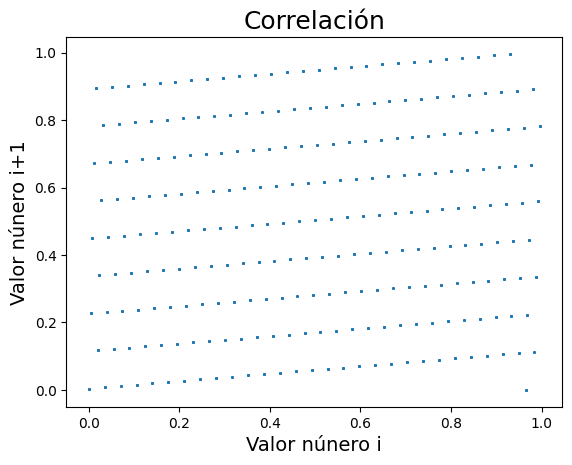

In [6]:
y=gene(57,1,256,10,1000)
plt.plot(y[:-1],y[1:],'o',ms = 1) #Al descartar la primer componente en una y la ultima en el otro me quedan correlacionadas la componente i con la i+1.
plt.xlabel('Valor núnero i',fontsize = 14)
plt.ylabel('Valor núnero i+1',fontsize = 14)
plt.title('Correlación',fontsize = 18)
plt.show()

Como puede verse en el grafico de arriba los numeros quedan alineados en bandas de distintas pendientes, lo que es una clara muestra de que los numeros no son aleatorios. Ademas, se ve que el numero de lineas depende del parametro a.

Por otro lado vemos que en este caso el periodo es de 256 que coincide con el valor de M, sin emabrgo al cambiar este valor se nota que M no es el periodo en todos los casos si no, que es la cota superior.

**2.1.2 Generador bueno**

Testeando nuestro generador para constantes mas razonables y viendo los generados propuestos en la literatura vemos que con nuevas constantes se obtienen numeros mucho mas aleatorios.
En este caso particular las constantes usadas fueron las dadas en el libro Numerical Recipes.

(a, c, M, x0)= (1664525,1013904223,2**32,10).


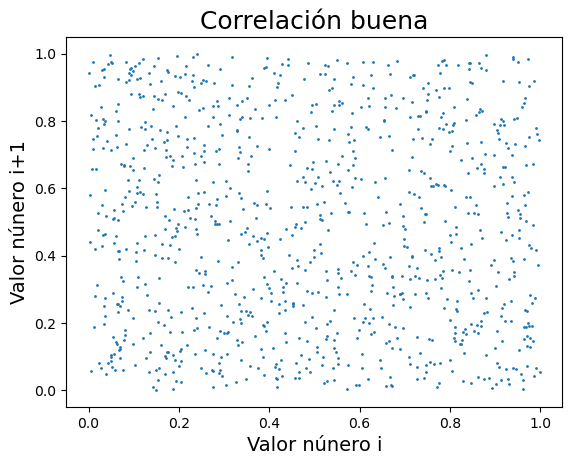

In [ ]:
y=gene(1664525,1013904223,2**32,10,1000)
plt.plot(y[:-1],y[1:],'o',ms = 1)
plt.xlabel('Valor núnero i',fontsize = 14)
plt.ylabel('Valor núnero i+1',fontsize = 14)
plt.title('Correlación buena',fontsize = 18)
plt.show()

Analizando el gráfico superior vemos una clara diferencia con el primer generador de numeros aleatorios, siendo este último mucho mejor ya que a simple viste no se nota una correlación entre los números.

**2.1.3 Momentos**

El calculo teorico del momento k de una distribucion esta dado por:

$ M(x^{k})$= $ \int_{-\infty}^{\infty} x^{k}p(x) \, dx $

En este caso todos los valores son igualmente probables, lo que nos da una $ p(x)=cte$. Ademas, como los numeros estan generados en el intervalo [0,1] se tiene que $ \int_{0}^{1}p(x) \, dx = 1$.

Finalmente, los momentos de orden k quedan determinados por la expresión:$ \int_{0}^{1} x^{k} \, dx = 1/(k +1) $


In [ ]:
n=input('momento de orden mas alto: ')
n=int(n)

momento de orden mas alto:  10


In [ ]:
moments = []
ideal = []
for i in range(n):

    m= np.mean(np.array(y)**(i+1)) #tiene un i+1 porque si no me quedaba elevado a la cero
    moments.append(m)
    k=1/(i+2)
    ideal.append(k)
print('los momentos de la distribución de numeros generados son:',moments) #momentos hasta orden k
print('Los momentos ideales hasta orden k son:',ideal)  #momentos ideales hasta orden k

los momentos de la distribución de numeros generados son: [0.4855425436673686, 0.3233190703911067, 0.24400701125171065, 0.1965823193282783, 0.1648422708304807, 0.14202302823818935, 0.12478484941415362, 0.11128124697512058, 0.1004048169236535, 0.09144933891045551]
Los momentos ideales hasta orden k son: [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091]




Teniendo en cuenta los momentos ideales y los de la distribución generada podemos hacer un grafico de ambos para ver que tanto se alejan los calculados de los ideales.

In [ ]:
lista = list(range(1, 11, 1))
print(lista)
lista_de_ceros = [0] * 10
print(lista_de_ceros)


#voy a ver la diferencia entre momentos calculados y los ideales
dif = []
for elemento1, elemento2 in zip(moments, ideal):
    dif.append(abs(elemento1 - elemento2))
print(dif)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0.014457456332631402, 0.010014262942226626, 0.005992988748289352, 0.0034176806717217123, 0.0018243958361859602, 0.0008341146189534965, 0.00021515058584638258, 0.0001701358640094769, 0.0004048169236534893, 0.000540248001364596]


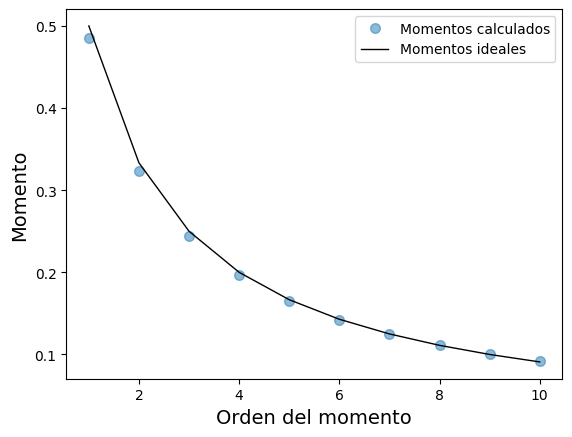

In [ ]:
plt.plot(lista,moments,'o', label='Momentos calculados',alpha=0.5,markersize=7)
plt.plot(lista,ideal,label='Momentos ideales',color='black', linewidth = 1)
plt.xlabel('Orden del momento',fontsize = 14)
plt.ylabel('Momento',fontsize = 14)
plt.legend()
plt.show()

Si bien en el gráfico superior pareceria que los momentos calculados coinciden con los ideales, podemos graficar la diferencia entre ellos para un mejor analisis.

En el gráfico inferior se puede ver que la diferencia es del orden de 0.01 en los momentos de orden mas bajo mientras que solo hay una diferencia de 0.002 para los momentos de orden mas alto.
Por otra parte, se puede ver que a medida que aumentamos la cantidad de números generados los momentos de la distribución se acercan cada vez mas a los teoricos.

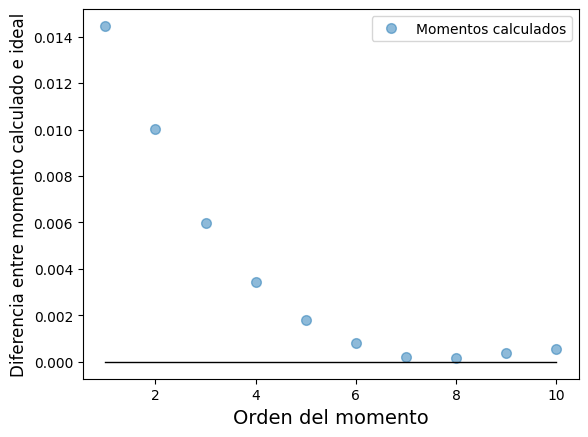

In [ ]:
plt.plot(lista,dif,'o',label='Momentos calculados',alpha=0.5,markersize=7)
plt.plot(lista,lista_de_ceros,color='black', linewidth = 1)
plt.xlabel('Orden del momento',fontsize = 14)
plt.ylabel('Diferencia entre momento calculado e ideal',fontsize = 12)
plt.legend()
plt.show()

**2.1.4 Caminata aleatoria**

Primero se realizó una caminata, es decir, de una semilla se siguen los pasos de los numeros aleatorios generados.

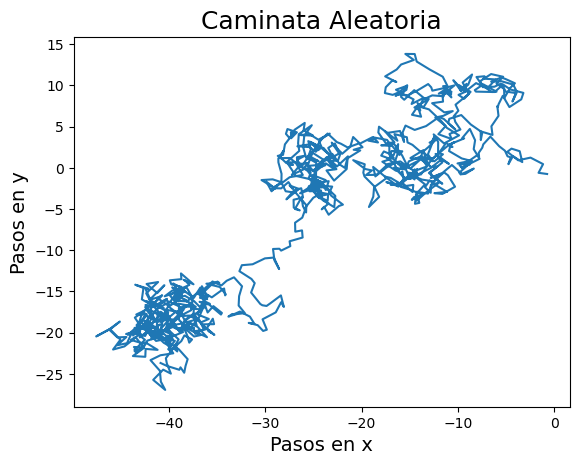

In [ ]:
#Cada coordenada tiene que empezar con una semilla distinta. Le puse 10 y 3, despues hacerlo con otro generador aleatorio, porque deberia hacerlo 10 veces para cada coordenada.

rx=gene(1664525,1013904223,2**32,10,1000)
ry=gene(1664525,1013904223,2**32,3,1000)

#Ahora tengo que usar la suma acumulada de esos numeros random para hacer la caminata

x=np.cumsum(np.array(rx)*2*np.sqrt(2)-np.sqrt(2))
y=np.cumsum(np.array(ry)*2*np.sqrt(2)-np.sqrt(2))

#Grafico de una sola caminata.
plt.plot(x,y)
plt.title('Caminata Aleatoria',fontsize = 18)
plt.xlabel('Pasos en x',fontsize = 14)
plt.ylabel('Pasos en y',fontsize = 14)
plt.show()



Luego se reliazaron 10 caminatas distintas, para lo que se necesitaron 10 semillas distintas. Para ello, se usó el generador de numeros aleaatorios para generar las 10 semillas.

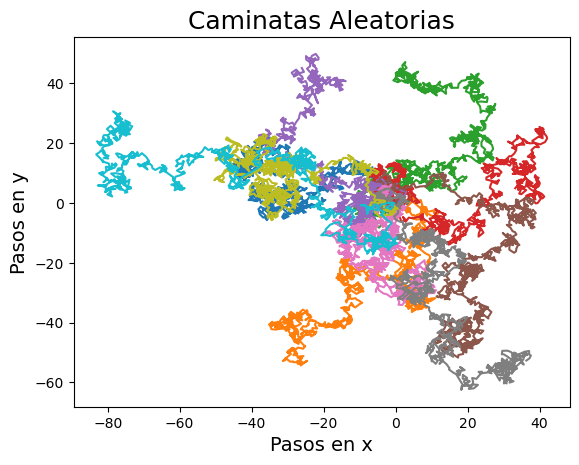

In [ ]:
#Quiero hacer 10 caminatas distintas, por lo tanto necesito 10 semillas distintas. Las puedo generar aleatoreamente.

#Tengo 20 semillas distintas, 10 para rx y 10 para ry.
s=gene(1664525,1013904223,2**32,15,20)

for i in range(10):         #Aca hago las 10 caminatas
    rx=gene(1664525,1013904223,2**32,2*s[i],1000)
    ry=gene(1664525,1013904223,2**32,7*s[i+1],1000)

#SUma acumulada para las caminatas
    x=np.cumsum(np.array(rx)*2*np.sqrt(2)-np.sqrt(2))
    y=np.cumsum(np.array(ry)*2*np.sqrt(2)-np.sqrt(2))

#Grafico de 10 caminatas.Esta dentro del for, entonces tengo todos los graficos juntos.
    plt.plot(x,y)
    plt.title('Caminatas Aleatorias',fontsize = 18)
    plt.xlabel('Pasos en x',fontsize = 14)
    plt.ylabel('Pasos en y',fontsize = 14)

#Cada color en el grafico representa una caminata.

Luego, se calculó la distancia al origen en funcion de los pasos para cada una de las caminatas, representadas una por cada color en el grafico de abajo.
Ademas, se realizó la caminata promedio de las 10 caminatas en funcion de los N pasos y en funcion de los $ \sqrt N $ pasos.

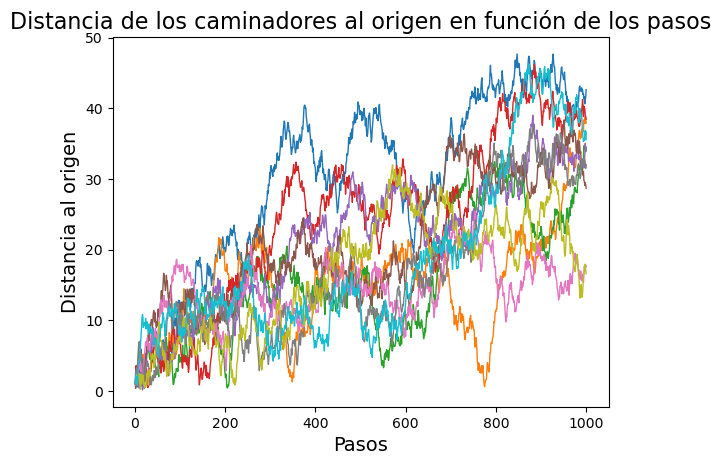

In [ ]:
#Ahora quiero ver la distancia al origen para cada una de las caminatas

s=gene(1664525,1013904223,2**32,15,20)
prom=0
for i in range(10):         #Aca hago las 10 caminatas
    rx=gene(1664525,1013904223,2**32,2*s[i],1000)
    ry=gene(1664525,1013904223,2**32,7*s[i+1],1000)

#SUma acumulada para las caminatas
    x=np.cumsum(np.array(rx)*2*np.sqrt(2)-np.sqrt(2))
    y=np.cumsum(np.array(ry)*2*np.sqrt(2)-np.sqrt(2))

    s = np.sqrt(x**2 + y**2)    #Aca calculo la distancia
    prom= prom + s
    p = list(range(1, 1001, 1))  #Pasos de 1 a 1000
    plt.plot(p,s,linewidth = 1)
    plt.xlabel('Pasos',fontsize = 14)
    plt.ylabel('Distancia al origen',fontsize = 14)
    plt.title('Distancia de los caminadores al origen en función de los pasos',fontsize = 16)


pt=prom/10

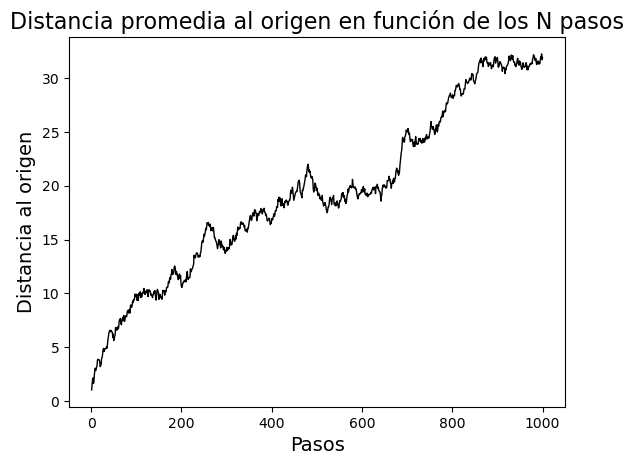

In [ ]:
plt.plot(p,pt, color='black', linewidth=1)  #caminata promedio en funcion de los N pasos
plt.xlabel('Pasos',fontsize = 14)
plt.ylabel('Distancia al origen',fontsize = 14)
plt.title('Distancia promedia al origen en función de los N pasos',fontsize = 16)
plt.show()

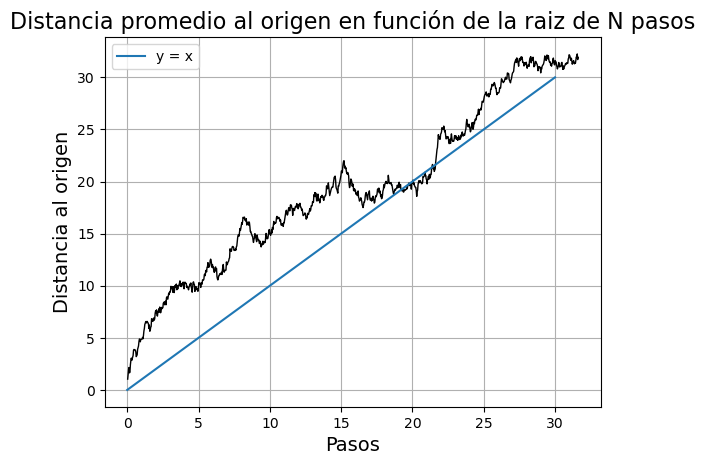

In [ ]:
#Ahora quiero ver el promedio pero en funcion de 1/sqrt(N)
#o sea x no va de 1 a 1000, si no de 1/sqrt(N) a 1000/sqrt(N)
p = list(range(1, 1001, 1))
p_n= p/np.sqrt(1000)
plt.plot(p_n,pt, color='black', linewidth=1)  #caminata promedio en funcion de los 1/sqrt(N) pasos
plt.xlabel('Pasos',fontsize = 14)
plt.ylabel('Distancia al origen',fontsize = 14)
plt.title('Distancia promedio al origen en función de la raiz de N pasos',fontsize = 16)


#Genera un array de 100 valores equidistantes en el intervalo [0, 30].
x = np.linspace(0, 30, 100)

# Ecuación de la recta con pendiente 1: y = x
y = x
plt.plot(x, y, label='y = x')
plt.legend()
plt.grid(True)
plt.show()

De los ultimos dos graficos se puede ver que la distancia al origen es aproximadamente lineal con $ \sqrt N $ pasos. Ademas, si aumentamos el numero de caminantes se puede ver que obtenemos un grafico con menor ruido.

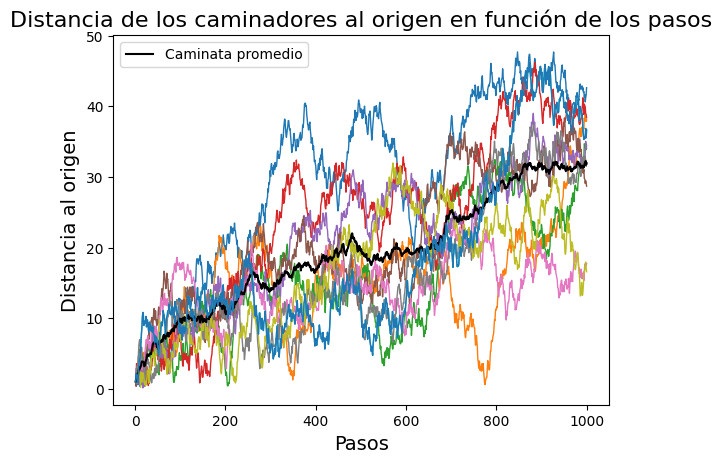

In [ ]:
#Ahora quiero ver en un mismo grafico las 10 caminatas y la caminata promedio, en funcion de N.

s=gene(1664525,1013904223,2**32,15,20)

for i in range(10):         #Aca hago las 10 caminatas
    rx=gene(1664525,1013904223,2**32,2*s[i],1000)
    ry=gene(1664525,1013904223,2**32,7*s[i+1],1000)

#SUma acumulada para las caminatas
    x=np.cumsum(np.array(rx)*2*np.sqrt(2)-np.sqrt(2))
    y=np.cumsum(np.array(ry)*2*np.sqrt(2)-np.sqrt(2))

    s = np.sqrt(x**2 + y**2)    #Aca calculo la distancia
    p = list(range(1, 1001, 1))  #Pasos de 1 a 1000
    plt.plot(p,s,linewidth = 1)
plt.plot(p,pt, color='black',label='Caminata promedio')  #en color negro la caminata promedio en funcion de los N pasos
plt.plot(p,s,linewidth = 1)
plt.xlabel('Pasos',fontsize = 14)
plt.ylabel('Distancia al origen',fontsize = 14)
plt.title('Distancia de los caminadores al origen en función de los pasos',fontsize = 16)
plt.legend()
plt.show()

**PROBLEMA 17**


En un catalogo de galaxias hay 4 tipos de galaxias, con probabilidades 0.4, 0.3, 0.2, y 0.1 para los tipos “elíptica”, “espiral”, “enana” e “irregular”, respectivamente.

Vamos a escribir un programa que genere aleatoriamente tipos de galaxias de tal forma que sigan la distribución dada.Para ello, tengo que tomar un generador aleatorio entre 0 y 1, y que me diga que si esta entre 0 y 0,4 es eliptica, entre 0,4 y 0,7 espiral , entre 0,7 y 0,9 enana y entre 0,9 y 1 irregular.

In [ ]:
y=gene(1664525,1013904223,2**32,10,10) #NUmeros aleatorios entre 0 y 1.
for i in range(10):
    if y[i] <0.4:
        print(y[i],'la galaxia es eliptica')
    elif 0.4< y[i] <0.7:
        print(y[i],'la galaxia es eliptica')
    elif 0.7< y[i] <0.9:
        print(y[i],'la galaxia es enana')
    else:
        print(y[i],'la galaxia es irregular')

0.23994349711574614 la galaxia es eliptica
0.1856045601889491 la galaxia es eliptica
0.6666164833586663 la galaxia es eliptica
0.03803055686876178 la galaxia es eliptica
0.048739948542788625 la galaxia es eliptica
0.09891615808010101 la galaxia es eliptica
0.654096252983436 la galaxia es eliptica
0.8015652266331017 la galaxia es enana
0.5949294364545494 la galaxia es eliptica
0.15628248173743486 la galaxia es eliptica


In [ ]:
#Puedo guardar cada numero en una lista para ver si la probabilidad es correcta.
Elliptical = []
Spiral = []
Dwarf = []
Irregular = []
y=gene(1664525,1013904223,2**32,10,10000) #NUmeros aleatorios entre 0 y 1.
n=5000
for i in range(n):
    if y[i] <0.4:
        #print(y[i],'la galaxia es eliptica')
        Elliptical.append(y[i])
    elif 0.4< y[i] <0.7:
        #print(y[i],'la galaxia es espiral')
        Spiral.append(y[i])
    elif 0.7< y[i] <0.9:
        #print(y[i],'la galaxia es enana')
        Dwarf.append(y[i])
    else:
        #print(y[i],'la galaxia es irregular')
        Irregular.append(y[i])
#print(Elliptical)
#print(Spiral)
#print(Dwarf)
#print(Irregular)

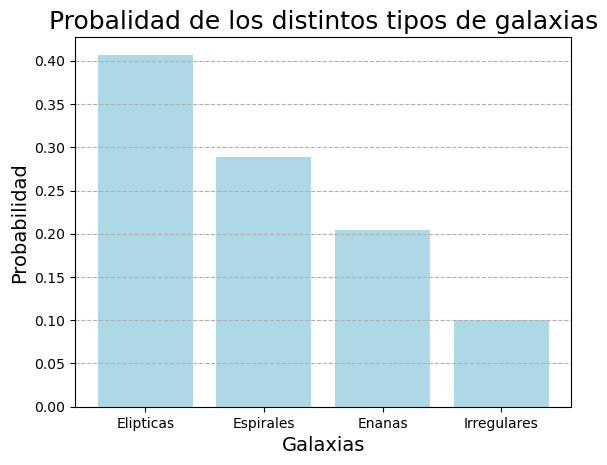

In [ ]:
galaxias =('Elipticas', 'Espirales', 'Enanas', 'Irregulares')
y=[len(Elliptical)/n, len(Spiral)/n, len(Dwarf)/n, len(Irregular)/n]  # calculo la probailidad
#print(y)  #se puede ver la probabilidad de cada tipo

plt.bar(galaxias,y, color=(0.68, 0.85, 0.90))
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.8)
plt.xlabel('Galaxias',fontsize = 14)
plt.ylabel('Probabilidad',fontsize = 14)
plt.title('Probalidad de los distintos tipos de galaxias',fontsize = 18)
plt.show()



Donde se puede ver que a medida que aumento el numero n de galaxias, la distribucion se aproxima mejor a la probabilidad teorica.

**2.3 PROBLEMA 18**

Un experimento aleatorio consiste en arrojar dos dados equilibrados y anotar la suma de los numeros resultantes en cada uno.

El espacio muestral es el conjunto de todos los posibles resultados (S), y la variable aleatoria (X) en este caso son los valores de la suma de los dados, es decir, de 1 a 12.

In [ ]:
#Primero tengo que escribir todas las opciones posibles, teoricas que puedo obtener al tirar dos dados
s=[]
S= []
a=[]
suma= []
for i in range (6):
    for j in range(6):
        s=[(i+1),(j+1)]
        S.append(s)

#Convertir la lista S en un array para poder sumar los dados
S_array = np.array(S)

#Ahora puedo sumar cada vector, que seria sumar el resultado de ambos dados.
suma= np.sum(S_array, axis=1) #Si pongo axis=0 lo que hace es sumarme la primera componente de cada vector y la segunda de cada vector y me da como resultado (a,b)- so sea axis=0 suma en filas y axis=1 en columnas.


print(S)
print(len(S))
print('La suma de ambos dados en todas las posibilidades es', suma)


[[1, 1], [1, 2], [1, 3], [1, 4], [1, 5], [1, 6], [2, 1], [2, 2], [2, 3], [2, 4], [2, 5], [2, 6], [3, 1], [3, 2], [3, 3], [3, 4], [3, 5], [3, 6], [4, 1], [4, 2], [4, 3], [4, 4], [4, 5], [4, 6], [5, 1], [5, 2], [5, 3], [5, 4], [5, 5], [5, 6], [6, 1], [6, 2], [6, 3], [6, 4], [6, 5], [6, 6]]
36
La suma de ambos dados en todas las posibilidades es [ 2  3  4  5  6  7  3  4  5  6  7  8  4  5  6  7  8  9  5  6  7  8  9 10
  6  7  8  9 10 11  7  8  9 10 11 12]


**2.3.1 Distribucion teorica**

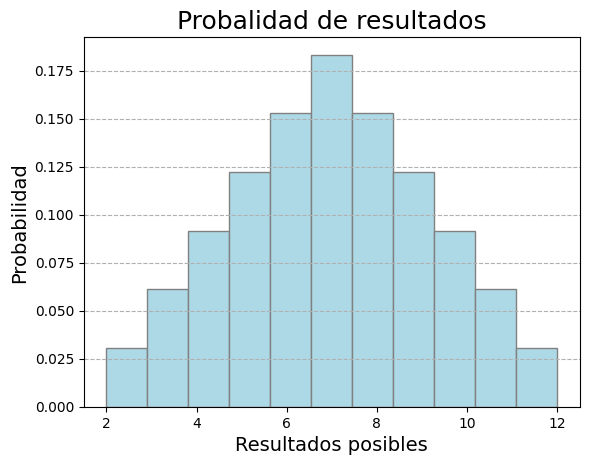

In [ ]:
#Grafico del histograma
plt.hist(suma, bins=11, color=(0.68, 0.85, 0.90), edgecolor='grey',density=True)  #POrque al poner bins=11 sale y si no, no.. o sea entiendo que tienen que ser 11, porque son los numeros del 2 al 12.. pero que esta pasando cuando no lo aclaro??
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.8)
plt.xlabel('Resultados posibles',fontsize = 14)
plt.ylabel('Probabilidad',fontsize = 14)
plt.title('Probalidad de resultados',fontsize = 18)
plt.show()                                                #Density True me cambia la frecuencia(conteo) que esta por default en el eje y para poner ahora probabilidad

**2.3.2 Distribucion dada por un generador**

In [ ]:
#Generar numeros aleatorios que sigan esta distribucion. O sea genero numeros entre 0 y 1.. y depende donde caigan le asigno un valor del dado.. como el de las galaxias, pero en lugar de 4 opciones voy a tener 11

y=gene(1664525,1013904223,2**32,10,10000) #NUmeros aleatorios entre 0 y 1.
n=1000
s=[]
for i in range(n):
    if y[i] <0.027:
       y[i]=2
       s.append(y[i])
    elif 0.027< y[i] <0.077:
        y[i]=3
        s.append(y[i])
    elif 0.077< y[i] <0.16:
        y[i]=4
        s.append(y[i])
    elif 0.16< y[i] <0.27:
        y[i]=5
        s.append(y[i])
    elif 0.27< y[i] <0.408:
        y[i]=6
        s.append(y[i])
    elif 0.408< y[i] <0.574:
        y[i]=7
        s.append(y[i])
    elif 0.574< y[i] <0.712:
        y[i]=8
        s.append(y[i])
    elif 0.712< y[i] <0.822:
        y[i]=9
        s.append(y[i])
    elif 0.822< y[i] <0.905:
        y[i]=10
        s.append(y[i])
    elif 0.905< y[i] <0.955:
        y[i]=11
        s.append(y[i])
    else:
        y[i]=12
        s.append(y[i])

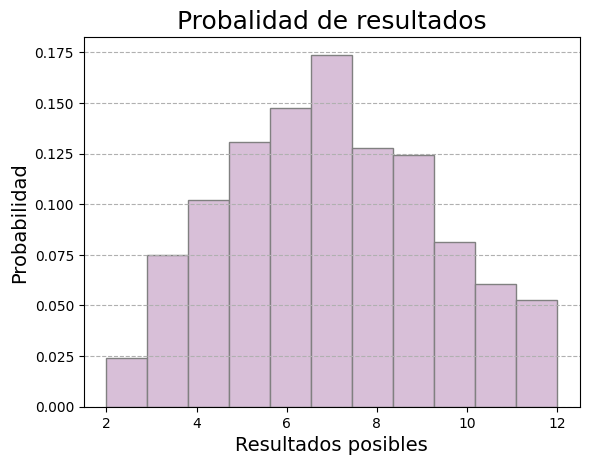

In [ ]:
#grafico del histograma de esta distribucion a ver si funciona
plt.hist(s, bins=11, color=(0.847, 0.749, 0.847), edgecolor='grey', density=True)
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.8)
plt.xlabel('Resultados posibles',fontsize = 14)
plt.ylabel('Probabilidad',fontsize = 14)
plt.title('Probalidad de resultados',fontsize = 18)
plt.show()

**2.3.3 Simulacion del experimento de tirar dos dados**

In [ ]:
# simulacion del experimento

#dado1
y=gene(1664525,1013904223,2**32,10,10000) #NUmeros aleatorios entre 0 y 1.
n=1000
d1=[]

for i in range(n):
    if y[i] <0.166:
       y[i]=1
       d1.append(y[i])
    elif 0.166< y[i] <0.333:
        y[i]=2
        d1.append(y[i])
    elif 0.333< y[i] <0.5:
        y[i]=3
        d1.append(y[i])
    elif 0.5< y[i] <0.666:
        y[i]=4
        d1.append(y[i])
    elif 0.666< y[i] <0.833:
        y[i]=5
        d1.append(y[i])
    else:
        y[i]=6
        d1.append(y[i])

#print(d1)

In [ ]:
#para el dado 2, no puedo usar el mismo generador porque eso me daria los mismos numeros-- entonces puedo cambiar la semilla

#dado2
y=gene(1664525,1013904223,2**32,27,10000) #NUmeros aleatorios entre 0 y 1.
n=1000
d2=[]

for i in range(n):
    if y[i] <0.166:
       y[i]=1
       d2.append(y[i])
    elif 0.166< y[i] <0.333:
        y[i]=2
        d2.append(y[i])
    elif 0.333< y[i] <0.5:
        y[i]=3
        d2.append(y[i])
    elif 0.5< y[i] <0.666:
        y[i]=4
        d2.append(y[i])
    elif 0.666< y[i] <0.833:
        y[i]=5
        d2.append(y[i])
    else:
        y[i]=6
        d2.append(y[i])

#print(d2)

In [ ]:
#Ahora tengo que sumar componente a componente cada lista.. para eso primero la transformo en un array.

suma_dados=np.array(d1) + np.array(d2)
#print(suma_dados)

#AHora puedo graficar el histograma de estos datos..


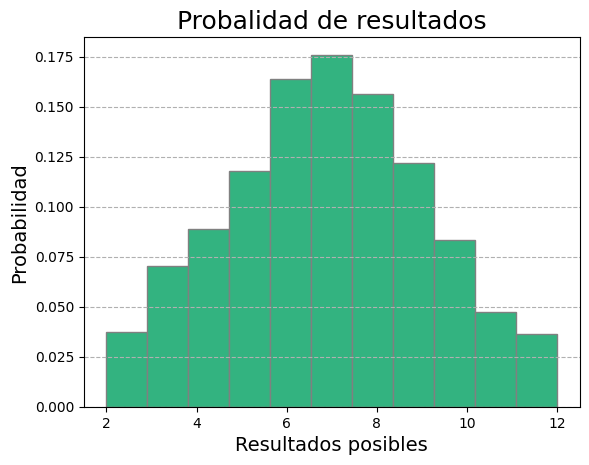

In [ ]:
plt.hist(suma_dados, bins=11, color=(0.2, 0.7, 0.5), edgecolor='grey', density=True)
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.8)
plt.xlabel('Resultados posibles',fontsize = 14)
plt.ylabel('Probabilidad',fontsize = 14)
plt.title('Probalidad de resultados',fontsize = 18)
plt.show()

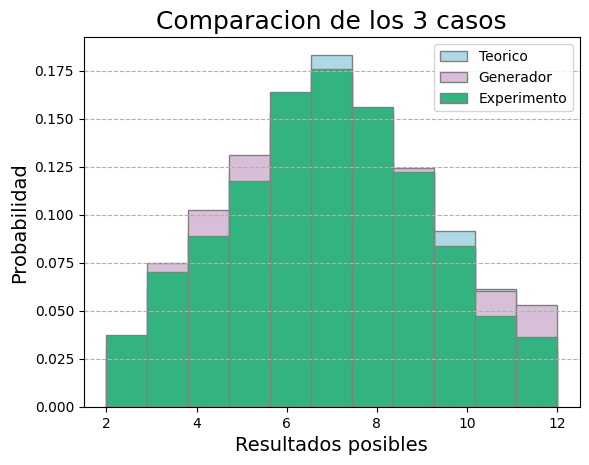

In [ ]:
#Ahora puedo comparar los 3 histogramas.
plt.hist(suma, bins=11, color=(0.68, 0.85, 0.90), edgecolor='grey', density=True, label='Teorico') #celeste
plt.hist(s, bins=11, color=(0.847, 0.749, 0.847), edgecolor='grey', density=True,label='Generador') #violeta
plt.hist(suma_dados, bins=11, color=(0.2, 0.7, 0.5), edgecolor='grey', density=True,label='Experimento')#verde
plt.grid(axis = 'y', linestyle = '--', linewidth = 0.8)
plt.xlabel('Resultados posibles',fontsize = 14)
plt.ylabel('Probabilidad',fontsize = 14)
plt.title('Comparacion de los 3 casos',fontsize = 18)
plt.legend()
plt.show()

**3 CONCLUSIONES**

Como conclusion de este trabajo, primeramente se puede decir que un generador de numeros aleatorios basado en el metodo de congruencia lineal depende fuertemente de los parametros iniciales. Siendo, los numeros generados, en algunos casos tan correlacionados que no servirian para un trabajo serio, mientras que con condiciones iniciales especificas llega a ser un buen generador.

Ademas, podemos notar que en todas las distribuciones de probabilidad se cumple el hecho de que a medida que aumento la cantidad de numeros generados las distribuciones se acercan cada vez mas a la teorica.
Por lo tanto, como conclusión final, un generador congruencial lineal con valores inciales apropiados y una muestra de datos, numeros aleatorios, lo suficientemente grande puede ser util para trabajos serios.